# Lecture 5 - 유용한 기능들

양자 회로를 시뮬레이터나 실제 양자 장치에 실행 시키기 위해 Qiskit은 여러가지의 유용한 기능들을 제공합니다.

1. IBMQ 백엔드 정보
2. Qiskit 도구

## 1. IBMQ 백엔드 정보

백엔드의 정보에 대해 [Lecture 3 - 양자 회로 실행과 백엔드](https://github.com/QuantumComputingKorea/Qiskit-Dev-Cert-lectures/blob/main/Lecture3/Lecture%203%20-%20%EC%96%91%EC%9E%90%20%ED%9A%8C%EB%A1%9C%20%EC%8B%A4%ED%96%89%EA%B3%BC%20%EB%B0%B1%EC%97%94%EB%93%9C.ipynb)에서 어느정도 다뤘지만 이번 강의에서 내용을 추가를 하여 다시 한번 다뤄보겠습니다.

In [17]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [18]:
IBMQ.load_account()  # 계정을 로드합니다.

ibmqfactory.load_account:WARNING:2022-09-06 02:59:29,881: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## `IBMQ.providers()`

접근 가능한 백엔드 제공자들을 출력합니다.

In [19]:
IBMQ.providers()  # 사용 가능한 백엔드 제공자를 확인합니다.

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-education', group='ibm-4', project='qiskit-hackathon')>,
 <AccountProvider for IBMQ(hub='strangeworks-hub', group='qc-com', project='runtime')>,
 <AccountProvider for IBMQ(hub='q-summer-school', group='main', project='project-3')>]

## 계정에서 접근 가능한 백엔드 목록

접근 가능한 백엔드의 목록을 출력하기 위해 두가지의 방법이 있습니다.
1. `backend()`
2. `get_provider()`

In [20]:
ibmq_account = IBMQ.load_account() # 계정을 로드하여 ibmq_account로 지정합니다.

ibmqfactory.load_account:WARNING:2022-09-06 02:59:41,136: Credentials are already in use. The existing account in the session will be replaced.


***
`backends()`를 사용한 목록 출력
***

In [21]:
backends = ibmq_account.backends() # 사용 가능한 백엔드를 확인합니다.
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

***
`get_provider()`를 사용한 목록 출력
***

In [22]:
ibmq_provider = IBMQ.get_provider(hub='ibm-q') # ibm-q 허브를 가져옵니다.
ibmq_provider.backends() # 허브에 있는 백엔드를 확인합니다.

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

이러한 목록 중에서 원하는 백엔드를 선택하여 양자 회로를 실행하고 싶으면 `get_backend`를 사용하거나 `backend.BACKENDNAME`을 사용할 수 있습니다.

In [23]:
backend = ibmq_account.get_backend('ibmq_manila') # 백엔드를 지정합니다.
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
backend = ibmq_account.backend.ibmq_manila # 백엔드를 지정합니다.
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

이러한 백엔드의 목록중 가장 대기열이 적은 백엔드를 찾기 위해서는 `least_bussy`를 사용할 수 있습니다.

In [25]:
least_busy(ibmq_provider.backends())

<IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>

백엔드 목록중에 원하는 조건부를 넣어 백엔드를 필터링을 하여 찾을 수 있습니다. 이에 대한 자세한 내용은 지난 강의인 [Lecture 3 - 양자 회로 실행과 백엔드](https://github.com/QuantumComputingKorea/Qiskit-Dev-Cert-lectures/blob/main/Lecture3/Lecture%203%20-%20%EC%96%91%EC%9E%90%20%ED%9A%8C%EB%A1%9C%20%EC%8B%A4%ED%96%89%EA%B3%BC%20%EB%B0%B1%EC%97%94%EB%93%9C.ipynb)에서 자세히 알 수 있습니다.

## 2. Qiskit 도구

Qiskit에서는 양자 장치나 시뮬레이선에 보낸 장치를 모니터링 하거나 백엔드를 모니터링 할 수 있는 도구를 재공하고 있습니다. 대표적인 도구들은 아래와 같습니다.
1. `backend_overview()`
2. `backend_monitor()`
3. `job_monitor`

### `backend_overview()`

IBMQ 백엔드의 접근 가능한 전체적인 정보를 출력합니다.

In [29]:
least_busy(ibmq_provider.backends(simulator=False, operational=True)) # 시뮬레이터가 아니고 작동 중인 백엔드 중 가장 빠른 백엔드를 가져옵니다.
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
from qiskit.tools import backend_overview # backend_overview를 불러옵니다.

In [ ]:
backend_overview() # 백엔드의 전체적인 정보를 확인합니다.

### `backend_monitor()`

하나의 IBMQ 백엔드의 정보를 출력합니다.

In [33]:
from qiskit.tools import backend_monitor # backend_monitor을 불러옵니다.

In [34]:
backend_monitor(backend) # 선택한 백엔드의 상태를 확인합니다.

ibmq_manila
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 152
    backend_version: 1.0.35
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    sample_name: family: Falcon, revision: 5.11, segment: L
    qubit_channel_mapping: [['u0', 'm0', 'u1', 'd0'], ['u1', 'u3', 'm1', 'u0', 'd1', 'u2'], ['d2', 'u3', 'm2', 'u4', 'u2', 'u5'], ['d3', 'u7', 'u4', 'm3', 'u6', 'u5'], ['u7', 'd4', 'm4', 'u6']]
    meas_map: [[0, 1, 2, 3, 4]]
    dynamic_reprate_enabled: True
    default_rep_delay: 250.0
    qubit_lo_range: [[4.462278512219218, 5.462278512219218], [4.337873583054781, 5.337873583054781], [4.537249657893639, 5.537249657893639], [4.450975050449358, 5.450975050449358], [4.564980520220528, 5.564980520220528]]
    supported_features: ['qobj']
    memory: True
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], 

### `job_monitor()`

백엔드에 보내진 양자 회로의 작업 상태를 모니터링 할 수 있게 해주는 도구 입니다.

In [37]:
from qiskit.tools import job_monitor # job_monitor를 불러옵니다.
from qiskit import *

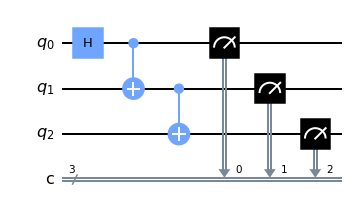

In [39]:
qc = QuantumCircuit(3,3) # 3개의 큐비트와 3개의 고전 비트를 가진 회로를 생성합니다.
qc.h(0) # 0번 큐비트에 하다마드 게이트를 적용합니다.
qc.cx(0,1) # 0번 큐비트와 1번 큐비트에 CNOT 게이트를 적용합니다.
qc.cx(1,2) # 1번 큐비트와 2번 큐비트에 CNOT 게이트를 적용합니다.
qc.measure([0,1,2],[0,1,2]) # 모든 큐비트를 측정합니다.
qc.draw(output='mpl') # 회로를 그립니다.

In [47]:
job=execute(qc,backend,shots=1024) # 1024번의 샷을 실행합니다.

In [48]:
job_monitor(job) # 작업의 진행 상황을 확인합니다.

Job Status: job has successfully run


In [49]:
result=job.result() # 결과를 가져옵니다.
counts=result.get_counts() # 결과의 카운트를 가져옵니다.
print(counts) # 카운트를 출력합니다.

{'000': 503, '111': 521}


보낸 작업도 여러가지의 모듈을 이용하여 정보를 불러올 수 있습니다.
1. `job_id`: 작업의 Id를 불러옵니다.
2. `backend()`: 작업이 보내진 백엔드의 정보를 불러옵니다.
3. `result()`: 작업의 결과를 불러옵니다.
4. `status()`: 작업의 상태를 불러옵니다.

In [50]:
job.job_id()

'63163e1e2a446d10d97ea5bb'

In [51]:
job.backend()

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>

In [52]:
job.result()

Result(backend_name='ibmq_qasm_simulator', backend_version='0.10.4', qobj_id='af3c8abd-1716-4cff-9684-a097d957b789', job_id='63163e1e2a446d10d97ea5bb', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 503, '0x7': 521}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-79', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, metadata={'active_input_qubits': [0, 1, 2], 'batched_shots_optimization': False, 'device': 'CPU', 'fusion': {'enabled': False}, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'measure_sampling': True, 'method': 'stabilizer', 'noise': 'ideal', 'num_clbits': 3, 'num_qubits': 3, 'parallel_shots': 1, 'parallel_state_update': 16, 'remapped_qubits': False}, seed_simulator=2728260334, time_taken=0.001962836)], date=2022-09-06 03:21:21.673227+09:00, status=C

In [53]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [54]:
import qiskit.tools.jupyter
%qiskit_version_table #qiskit 버전 표시하기